# Analyze MLD depth of time series data
(from BCO CTDdat file)

This .ncdf file is a collection of monthly CTD runs at CARIACO Ocean Time Series Station.

In [27]:
require(dplyr, warn.conflicts = FALSE)
require(cowplot, warn.conflicts = FALSE)

In [28]:
# read CTDdat file
ctd <- read.csv("DATA_processed/CTDdat_processed.csv")

# read Date column as POSIXct
ctd$Date <- as.POSIXct(ctd$Date, format="%Y-%m-%d")

## calculate MLD depth, defined as a change in sigma t of 0.125

In [29]:
mld_depth <- ctd %>%
  group_by(CruiseID) %>% # this groups it by the run number 
  filter(press > 8) %>% # only take values below 8 meters depth to minimze influence of surface anomalies
  mutate(belowmld = sigma_t >= sigma_t[1]+0.125 | sigma_t <= sigma_t[1]-0.125) %>% # create new column that gives "True" for values below MLD
  filter(belowmld == T) %>% # only take "True" values 
  slice(1) %>% # takes the first occurrence
  ungroup() #removes grouping

## save calculated MLD depth to csv file

In [30]:
# Write CSV
write.csv(mld_depth, file = "DATA_processed/MLD_depth_calculated.csv")

## plot MLD depth over time

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


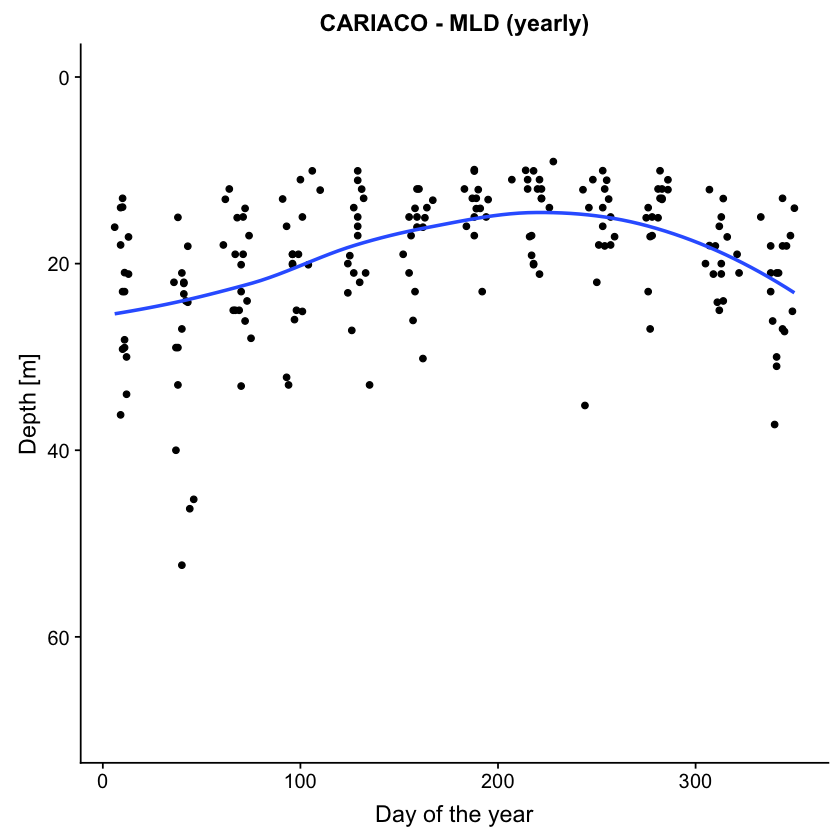

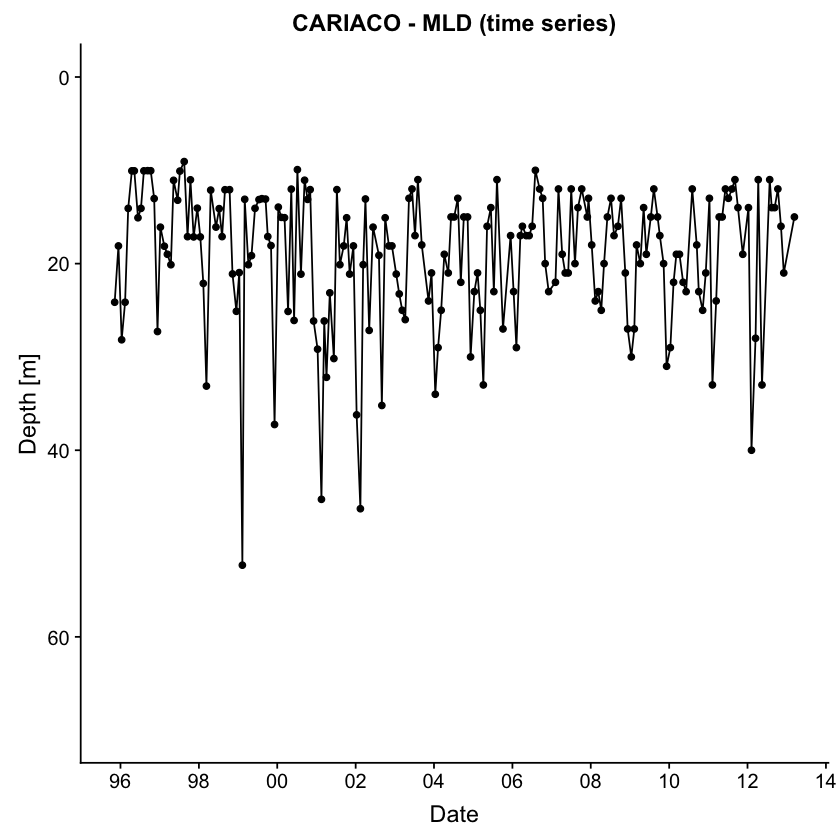

In [26]:
ggplot(mld_depth,aes(x=days%%365,y=press))+
  geom_point()+stat_smooth(se=F)+ scale_y_reverse(lim=c(70,0)) +
  ylab("Depth [m]")+ xlab("Day of the year")+ggtitle("CARIACO - MLD (yearly)")

ggplot(mld_depth,aes(x=Date,y=press))+
  geom_point()+ geom_line() + scale_y_reverse(lim=c(70,0)) +
  ylab("Depth [m]")+ xlab("Date")+ggtitle("CARIACO - MLD (time series)")+
  scale_x_datetime(date_breaks = "2 years", date_labels = "%y")